In [ ]:
n cases where we have an empty cell in the columns -scheduled_departures, FLIGHT,
TEMPERRATURE_departures.
In cases where the character "-" indicates an empty cell in the columns - actual_outputs, temperature_outputs.
In cases where we have the string "calm" and not a number in the column - WIND_departures
4) In cases where we have the string "variable" and not a number in the column - DIRECTION_departuresimport numpy as np
import pandas as pd
import time
from datetime import datetime
import random
import csv
from datetime import datetime, timedelta
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr

#Data Visualization and EDA

At this stage, we visualized a single column, which is the flight delay for both arrival and departure. This columns is the basis of the project so we wanted to test it. We made 3 types of graphs for he

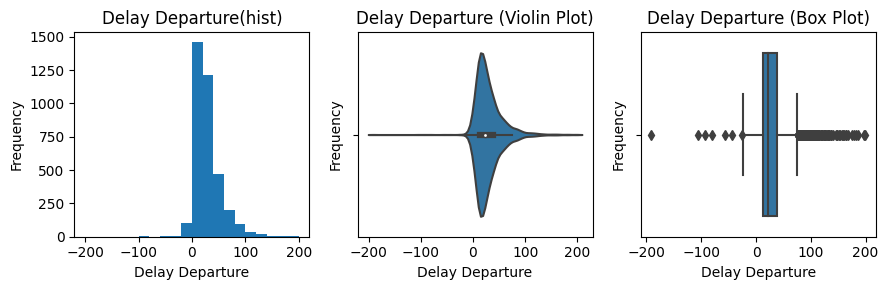

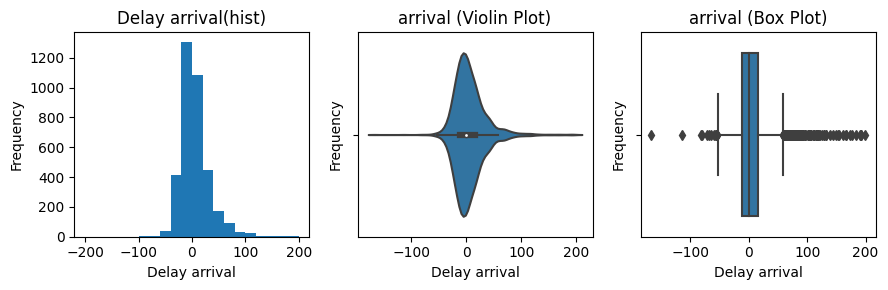

In [ ]:
#@title  Visualization of a single variable (Flight Delay)
# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Filter the "delay_departure" values within the desired range
filtered_data = data[(data['delay_departure'] >= -200) & (data['delay_departure'] <= 200)]

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram
axs[0].hist(filtered_data['delay_departure'], bins=20, range=(-200, 200))
axs[0].set_xlabel('Delay Departure')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Delay Departure(hist)')

# Plot violin plot
sns.violinplot(x=filtered_data['delay_departure'], ax=axs[1])
axs[1].set_xlabel('Delay Departure')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Delay Departure (Violin Plot)')

# Plot box plot
sns.boxplot(x=filtered_data['delay_departure'], ax=axs[2], whis=1.5)
axs[2].set_xlabel('Delay Departure')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Delay Departure (Box Plot)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Filter the "delay_departure" values within the desired range
filtered_data = data[(data['delay_arrival'] >= -200) & (data['delay_arrival'] <= 200)]

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Plot histogram
axs[0].hist(filtered_data['delay_arrival'], bins=20, range=(-200, 200))
axs[0].set_xlabel('Delay arrival')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Delay arrival(hist)')

# Plot violin plot
sns.violinplot(x=filtered_data['delay_arrival'], ax=axs[1])
axs[1].set_xlabel('Delay arrival')
axs[1].set_ylabel('Frequency')
axs[1].set_title('arrival (Violin Plot)')

# Plot box plot
sns.boxplot(x=filtered_data['delay_arrival'], ax=axs[2], whis=1.5)
axs[2].set_xlabel('Delay arrival')
axs[2].set_ylabel('Frequency')
axs[2].set_title('arrival (Box Plot)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

We will take from the 2 columns containing the delay times only the values between 200 and (-200) minutes because most of the information is there

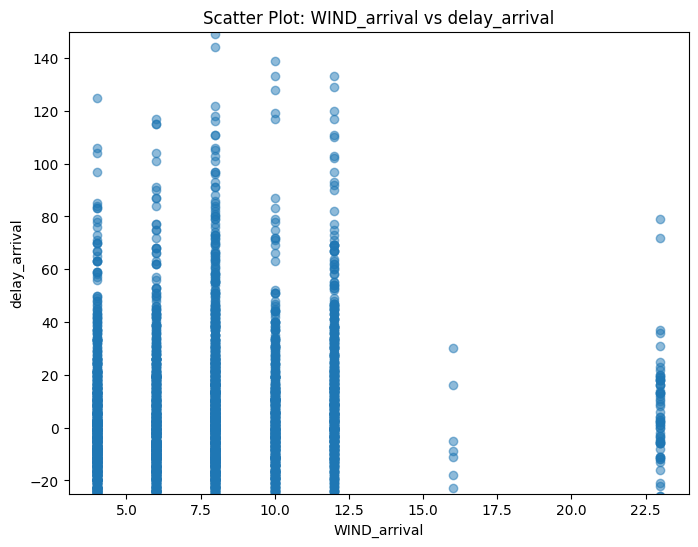

In [ ]:
#@title Two-dimensional visualization

# Select the columns of interest
delay_arrival = data['delay_arrival']
wind_arrival = data['WIND_arrival']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(wind_arrival,delay_arrival, alpha=0.5)
plt.xlabel('WIND_arrival')
plt.ylabel('delay_arrival')
plt.title('Scatter Plot: WIND_arrival vs delay_arrival')
plt.ylim(-25, 150)
plt.show()



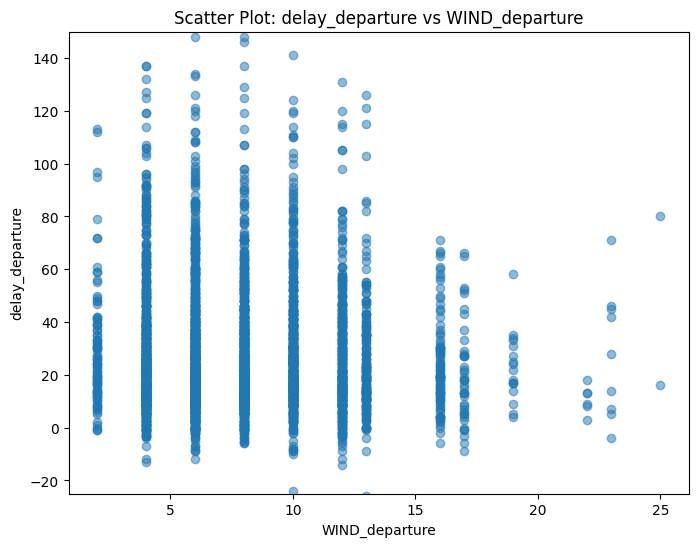

In [ ]:
# Select the columns of interest
delay_departure = data['delay_departure']
WIND_departure = data['WIND_departures']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(WIND_departure,delay_departure, alpha=0.5)
plt.xlabel('WIND_departure')
plt.ylabel('delay_departure')
plt.title('Scatter Plot: delay_departure vs WIND_departure')
plt.ylim(-25, 150)  # Set the x-axis limits

plt.show()



The two code cells above includes two scatter plots to visualize relationships between variables in your project:

    Scatter Plot: WIND_arrival vs. delay_arrival

    It shows the relationship between the 'WIND_arrival' variable and the 'delay_arrival' variable.
    The scatter plot displays data points where the x-axis represents 'WIND_arrival' values and the y-axis represents 'delay_arrival' values.
    The transparency of the data points is set to 0.5 for better visualization.
    The plot provides insights into any potential correlation or pattern between wind conditions during arrival and the - corresponding delays. * The y-axis range is limited to -25 to 150 to focus on the relevant data range.

    Scatter Plot: delay_departure vs. WIND_departure

    It visualizes the relationship between the 'delay_departure' variable and the 'WIND_departure' variable.
    The scatter plot shows the distribution of data points with 'WIND_departure' values on the x-axis and 'delay_departure' values on the y-axis.
    Data points are semi-transparent (alpha = 0.5) to aid in visual clarity.
    This plot helps explore any potential correlation or trend between wind conditions during departure and corresponding departure delays.

The y-axis range is limited to -25 to 150 to focus on the relevant data range.
These scatter plots provide concise visual summaries of the relationships between wind conditions and arrival/departure delays in your project. They assist in identifying potential associations or patterns between the variables being analyzed.


**[CORRELATION MATRIX]**


Pearson :

The code calculates the Pearson correlation coefficient to measure the linear relationship between variables.

Specifically, it computes correlations for arrival delays with wind conditions, temperature, and scheduled arrival hour. Similarly, it calculates correlations for departure delays with wind conditions, temperature, and scheduled departure hour. These correlations provide insights into how these variables are related to arrival and departure delays.


In [ ]:
# Select the columns of interest
delay_arrival = data['delay_arrival']
wind_arrival = data['WIND_arrival']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(wind_arrival, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,WIND_arrival]:", corr)
# Select the columns of interest
delay_arrival = data['delay_arrival']
TEMPERRATURE_arrival = data['TEMPERRATURE_arrival']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(TEMPERRATURE_arrival, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,TEMPERRATURE_arrival]:", corr)
# Select the columns of interest
delay_arrival = data['delay_arrival']
scheduled_arrival_hour = data['scheduled_arrival_hour']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(scheduled_arrival_hour, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,scheduled_arrival_hour]:", corr)

Pearson Correlation Coefficient between[delay_arrival,WIND_arrival]: 0.08238526629381804
Pearson Correlation Coefficient between[delay_arrival,TEMPERRATURE_arrival]: -0.13180068767218955
Pearson Correlation Coefficient between[delay_arrival,scheduled_arrival_hour]: 0.14290778112405977


In [ ]:
# Select the columns of interest
delay_departure = data['delay_departure']
wind_departures = data['WIND_departures']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(wind_departures, delay_departure)

print("Pearson Correlation Coefficient between[delay_departure,WIND_departures]:", corr)
# Select the columns of interest
delay_departure = data['delay_departure']
TEMPERRATURE_departures = data['TEMPERRATURE_departures']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(TEMPERRATURE_departures, delay_departure)

print("Pearson Correlation Coefficient between[delay_departure,TEMPERRATURE_departures]:", corr)
# Select the columns of interest
delay_arrival = data['delay_arrival']
scheduled_departure_hour = data['scheduled_departure_hour']

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(scheduled_departure_hour, delay_arrival)

print("Pearson Correlation Coefficient between[delay_arrival,scheduled_departure_hour]:", corr)

Pearson Correlation Coefficient between[delay_departure,WIND_departures]: -0.03778730195145874
Pearson Correlation Coefficient between[delay_departure,TEMPERRATURE_departures]: -0.08051904328972238
Pearson Correlation Coefficient between[delay_arrival,scheduled_departure_hour]: 0.07430303267061733




Correlation Heatmap:

    Variables of interest, including 'delay_departure', 'TEMPERRATURE_departures', and 'scheduled_departure_hour', are selected.
    The correlation matrix is computed to measure the relationships between the variables.
    A heatmap is created to visualize the correlation matrix.


**[FOR DELAY VARIABLES]**

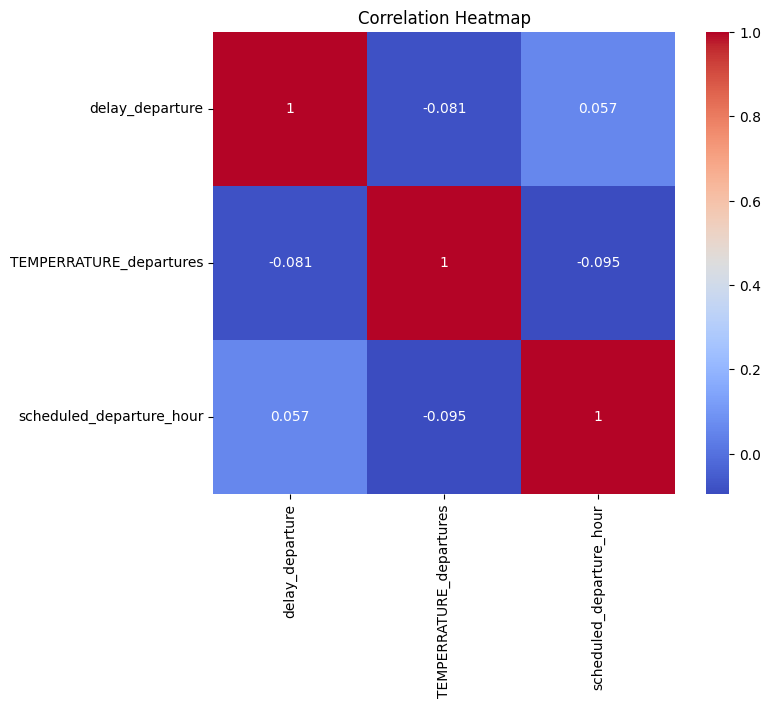

In [ ]:

# Select the variables of interest
variables = ['delay_departure', 'TEMPERRATURE_departures', 'scheduled_departure_hour']
selected_data = data[variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()



**[FOR ARRIVAL VARIABLES]**

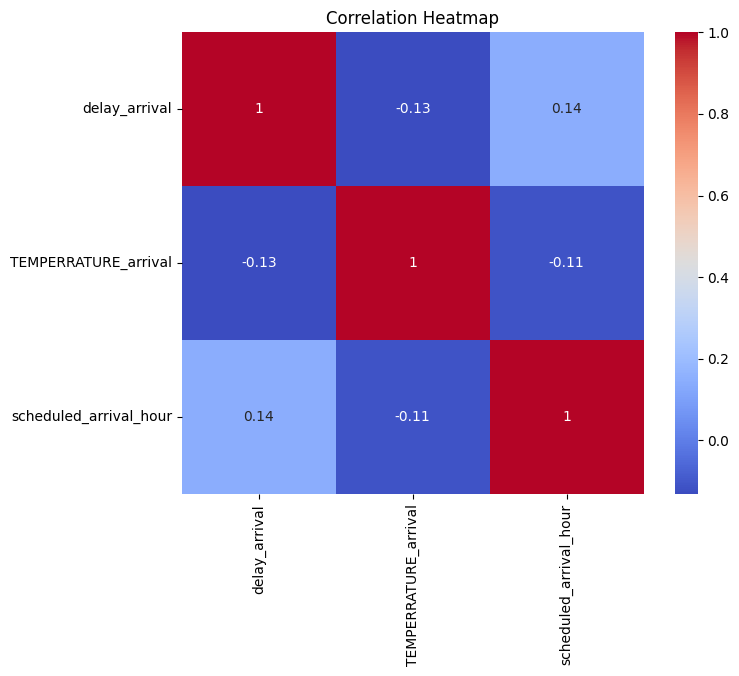

In [ ]:
# Select the variables of interest
variables = ['delay_arrival', 'TEMPERRATURE_arrival', 'scheduled_arrival_hour']
selected_data = data[variables]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()



In [ ]:
#@title Multidimensional visualization

     
    1.Grouped Bar Plot

    a) The data is grouped by the 'delay_departure' column.
    b) The mean values of selected columns, including   'TEMPERRATURE_departures', 'WIND_departures', and 'scheduled_departure_hour', are calculated.
    c) A grouped bar plot is created to visualize the average values of the selected columns for each 'delay_departure' group.

    2.Another Grouped Bar Plot:

    a) Similar to the previous section, the data is grouped by the 'delay_arrival' column.
    b) The mean values of selected columns, including 'TEMPERRATURE_arrival', 'WIND_arrival', and 'scheduled_arrival_hour', are calculated.
    c) A grouped bar plot is created to visualize the average values of the selected columns for each 'delay_arrival' group.

    3.3D Scatter Plot:

    a)Variables of interest, including 'delay_departure', 'TEMPERRATURE_departures', and 'scheduled_departure_hour', are selected.
    b)A 3D scatter plot is created to visualize the relationship between the variables.

    4.Another 3D Scatter Plot:

    a)Similar to the previous 3D scatter plot, this section focuses on 'delay_arrival', 'TEMPERRATURE_arrival', and 'scheduled_arrival_hour' variables.
    b)Similar to the previous correlation heatmap, this section focuses on 'delay_arrival', 'TEMPERRATURE_arrival', and 'scheduled_arrival_hour' variables.

These visualizations and analyses help understand the relationships and patterns in the data. They can be useful for exploratory data analysis and gaining insights into the dataset.

<ipython-input-16-f751045fa116>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb = data.groupby(['delay_departure']).mean()[['TEMPERRATURE_departures', 'WIND_departures', 'scheduled_departure_hour']]


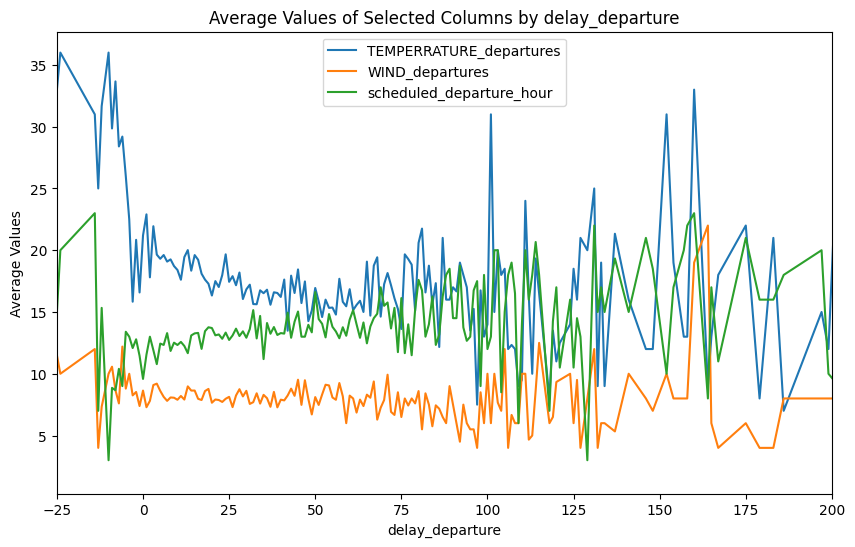

In [ ]:
# Group the data by 'delay_departure'
gb = data.groupby(['delay_departure']).mean()[['TEMPERRATURE_departures', 'WIND_departures', 'scheduled_departure_hour']]

# Create the grouped bar plot
ax = gb.plot(figsize=(10, 6))

# Set the labels and title
plt.xlabel('delay_departure')
plt.ylabel('Average Values')
plt.title('Average Values of Selected Columns by delay_departure')

# Set y-axis limit
ax.set_xlim(-25, 200)

# Show the plot
plt.show()

<ipython-input-20-501860d963bf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb = data.groupby(['delay_arrival']).mean()[['TEMPERRATURE_arrival', 'WIND_arrival', 'scheduled_arrival_hour']]


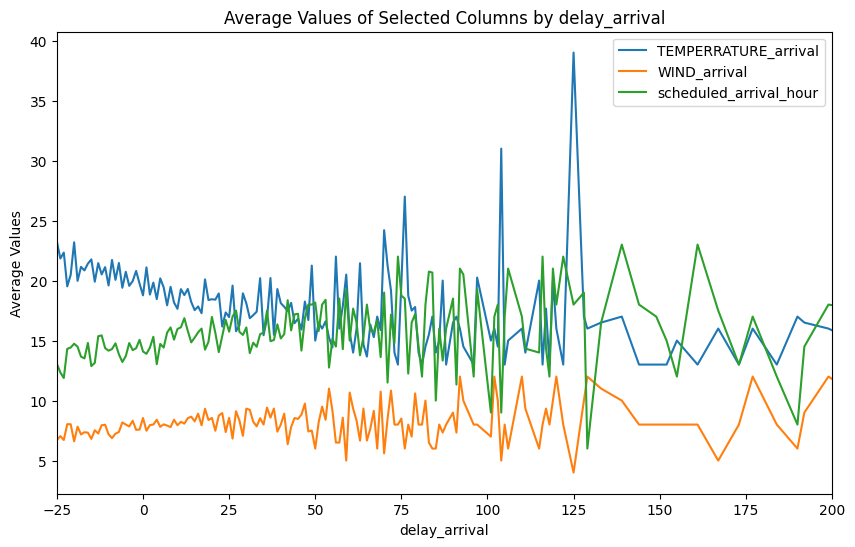

In [ ]:
# Group the data by 'delay_departure'
gb = data.groupby(['delay_arrival']).mean()[['TEMPERRATURE_arrival', 'WIND_arrival', 'scheduled_arrival_hour']]

# Create the grouped bar plot
ax = gb.plot(figsize=(10, 6))

# Set the labels and title
plt.xlabel('delay_arrival')
plt.ylabel('Average Values')
plt.title('Average Values of Selected Columns by delay_arrival')

# Set y-axis limit
ax.set_xlim(-25, 200)

# Show the plot
plt.show()



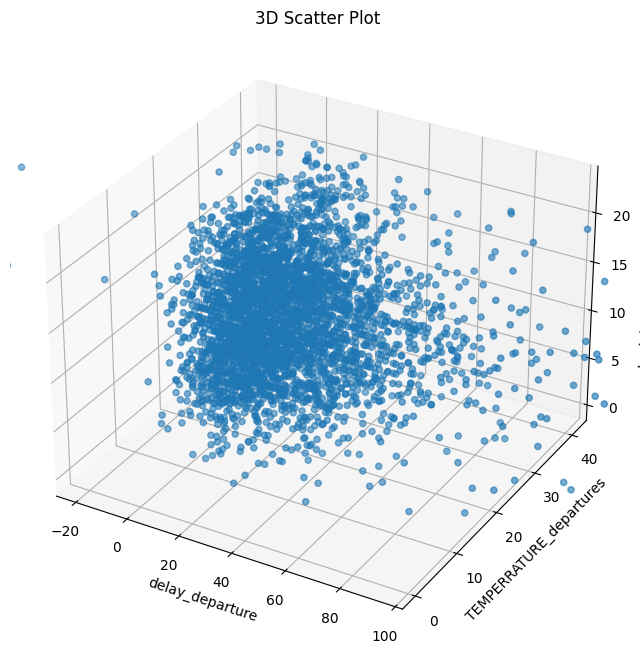

In [ ]:
# Select the variables of interest
delay_departure = data['delay_departure']
temperature_departures = data['TEMPERRATURE_departures']
scheduled_departure_hour = data['scheduled_departure_hour']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(delay_departure, temperature_departures, scheduled_departure_hour)

# Set labels and title
ax.set_xlabel('delay_departure')
ax.set_xlim(-25, 100)
ax.set_ylabel('TEMPERRATURE_departures')

ax.set_zlabel('scheduled_departure_hour')

ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()



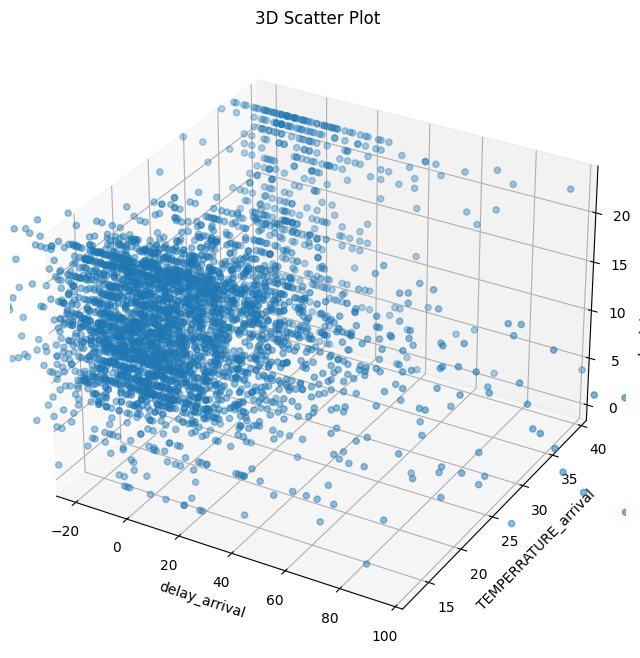

In [ ]:
# Select the variables of interest
delay_departure = data['delay_arrival']
temperature_departures = data['TEMPERRATURE_arrival']
scheduled_departure_hour = data['scheduled_arrival_hour']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(delay_departure, temperature_departures, scheduled_departure_hour)

# Set labels and title
ax.set_xlabel('delay_arrival')
ax.set_xlim(-25, 100)
ax.set_ylabel('TEMPERRATURE_arrival')

ax.set_zlabel('scheduled_arrival_hour')

ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()



#Models Employed

In this part of the process, we aim to find the best model accuracy for predicting delay departure and delay arrival in airline data.
For each Model we tried for both Delay Depature and Delay Arrival

In [ ]:
#@title Linear Regression [Delay Departure]

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.71831516047533


The model accuracy for delay departure prediction is 0.71831516047533.

In [ ]:
#@title Linear Regression [Delay Arrival]
# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.5696983466363629


The model accuracy for delay arrival prediction is 0.5696983466363629.

In [ ]:
#@title Random Forest (Delay Departure)

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.7765340094843546


The model accuracy for delay departure prediction using the random forest is 0.7765340094843546.

In [ ]:
#@title Random Forest (Delay Arrival)

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.8436364230025993


The model accuracy for delay Arrival prediction using the random forest regressor is 0.8436364230025993

In [ ]:
#@title Gradient Boost (Delay Departure)

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure', 'actual_departures'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.8433379292827841


The model accuracy for delay departure prediction using the gradient boosting regressor is 0.8433379292827841.

In [ ]:
#@title Gradient Boost (Delay Arrival)

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival', 'actual_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8659596309495732


The model accuracy for delay arrival prediction using the gradient boosting regressor is 0.8659596309495732.

Based on the above three algorithms Gradient Boost has shown promising results compared to other two, so have tried to improve the Gradient Boost model further

#Gradient Boost Improvised

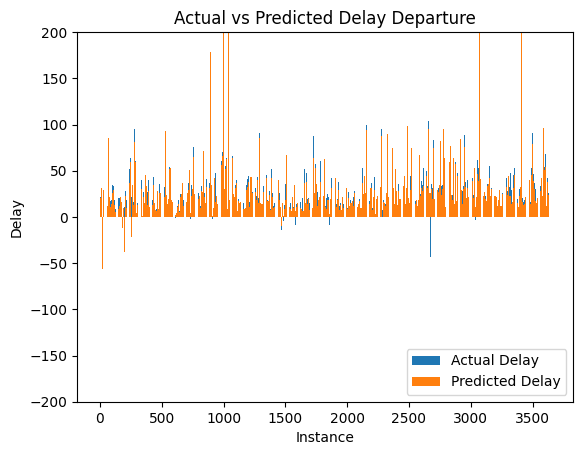

Accuracy: 93.551856%
Feature importances:
                   Feature  Importance
5            delay_arrival    0.613637
7   scheduled_arrival_hour    0.100462
4             WIND_arrival    0.085243
2     DIRECTION_departures    0.084675
3     TEMPERRATURE_arrival    0.049209
1          WIND_departures    0.037412
0  TEMPERRATURE_departures    0.019946
6        direction_arrival    0.009415


In [ ]:
#@title Delay Departure

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_departure']
data = data.drop(['delay_departure', 'actual_departures','scheduled_departures','direction_departure','scheduled_departure_hour'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values
col_names = data.select_dtypes(include=['int', 'float']).columns

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Delay': y, 'Predicted Delay': y_pred})

# Create an array for x-axis values (indices)
x = np.arange(len(results_df))

# Plot the bar plot
plt.bar(x, results_df['Actual Delay'], label='Actual Delay')
plt.bar(x, results_df['Predicted Delay'], label='Predicted Delay')
plt.xlabel('Instance')
plt.ylabel('Delay')
plt.title('Actual vs Predicted Delay Departure')
plt.ylim(-200, 200)  # Set the Y-axis limits
plt.legend()
plt.show()

# Print the accuracy percentage
accuracy = model.score(X, y) * 100
print("Accuracy: {:.6f}%".format(accuracy))

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with the column names and feature importances
importance_df = pd.DataFrame({'Feature': col_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature importances:")
print(importance_df)

The model accuracy for delay departure prediction using the gradient boosting regressor with feature importance is 93.551856%

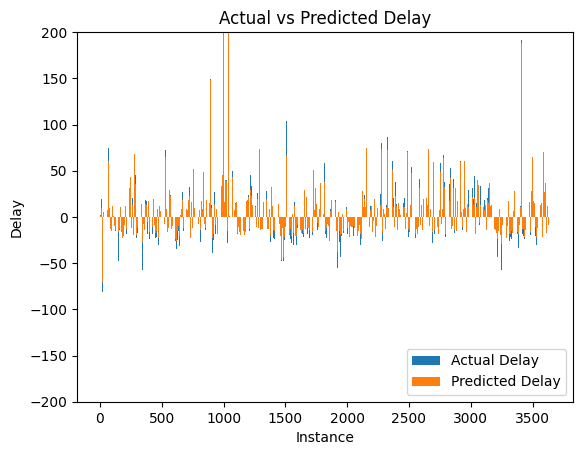

Accuracy: 94.647679%
Feature importances:
                    Feature  Importance
4           delay_departure    0.710514
6         direction_arrival    0.201699
2      DIRECTION_departures    0.037456
7  scheduled_departure_hour    0.016308
3              WIND_arrival    0.016012
0   TEMPERRATURE_departures    0.010078
1           WIND_departures    0.007717
5       direction_departure    0.000216


In [ ]:
#@title Delay Arrival

# Load the dataset
data = pd.read_csv('flight_Data.csv')

# Prepare X and y
y = data['delay_arrival']
data = data.drop(['delay_arrival', 'actual_arrival','scheduled_arrival','scheduled_arrival_hour', 'TEMPERRATURE_arrival'], axis=1)
X = data.select_dtypes(include=['int', 'float']).values
col_names = data.select_dtypes(include=['int', 'float']).columns

# Train the machine learning model (Gradient Boosting Regressor)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual Delay': y, 'Predicted Delay': y_pred})

# Create an array for x-axis values (indices)
x = np.arange(len(results_df))

# Plot the bar plot
plt.bar(x, results_df['Actual Delay'], label='Actual Delay')
plt.bar(x, results_df['Predicted Delay'], label='Predicted Delay')
plt.xlabel('Instance')
plt.ylabel('Delay')
plt.title('Actual vs Predicted Delay')
plt.ylim(-200, 200)  # Set the Y-axis limits
plt.legend()
plt.show()

# Print the accuracy percentage
accuracy = model.score(X, y) * 100
print("Accuracy: {:.6f}%".format(accuracy))

# Get the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with the column names and feature importances
importance_df = pd.DataFrame({'Feature': col_names, 'Importance': feature_importances})

# Sort the DataFrame by feature importances in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Print the feature importances
print("Feature importances:")
print(importance_df)

The model accuracy for delay arrival prediction using the gradient boosting regressor with feature importance is 94.647679%.